# Treinamento FITS usando astropy

## Introdução e Abertura da Imagem

#### Site utilizado para o treinamento
#### http://learn.astropy.org/FITS-images.html

In [1]:
# Aqui vamos ver os pacotes que vamos usar, primeiro numpy

import numpy as np

# Aqui o matplotlib, mas ele sugere usar esses parâmetros abaixo de plot
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#A linha abaixo deixei comentada porque deu erro
#matplotlib.rc_file("../../templates/matplotlibrc")

# Pacotes astropy
from astropy.utils.data import download_file
from astropy.io import fits


In [2]:
# Download da imagem da nebulosa da cabeça de cavalo direto do site

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

## Análise e plot da Imagem da Cabeça de Cavalo

In [3]:
# EXAMINANDO A IMAGEM FITS

# Abrindo a imagem, uma imagem FITS é dividida em blocos, o resultado é a relação dos blocos da imagem. 

hdu_list = fits.open(image_file)
hdu_list.info()

# Vamos ver informações da imagem.A informação da imagem costuma estar no bloco primário, que tem número zero. Vou
#primeiro nomear e depois ver o tipo de formato e tamanho. Vai dar que é um numpy array e (acho) que a relação de 
#linhas e colunas (pixels em x e y).

image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)

Filename: /home/fabio/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
<class 'numpy.ndarray'>
(893, 891)


In [9]:
# Se não quisesse ver esse header poderia ir direto pra cá, AO INVÉS da cálula acima. Nisso não teria que usar nada
#desse HDU_list. Perceba que ele já entende em qual bloco tá a informação da imagem.

image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


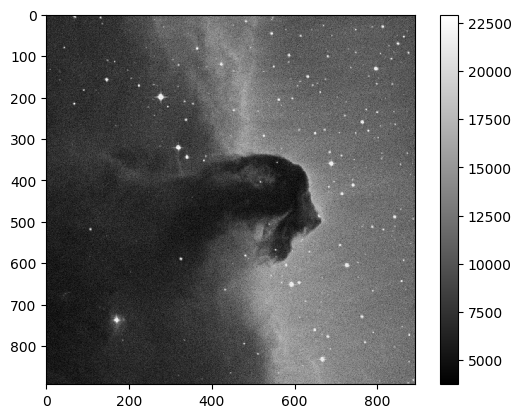

In [242]:
# Visualizando a imagem com colorbar em função de contagens.

#Repare que para arrays bidimensionais esse imshow já entende plotar o gráfico colorbar.

plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [6]:
# Vendo estatísticas da imagem (valores de contagens de pixels). Máximo, mínimo, média e desvio padrão.
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


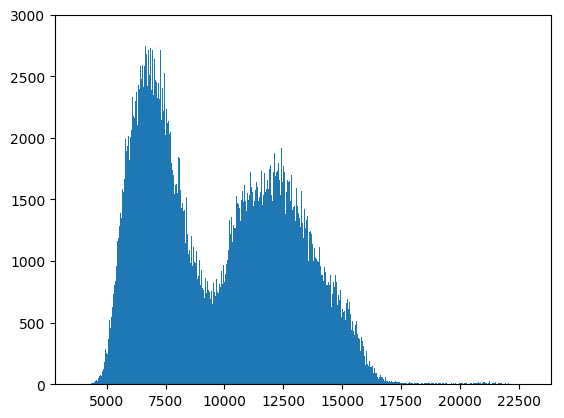

In [8]:
# Minhas contagens estão em 2D, pra fazer um histograma de contagem por pixel, preciso, achatar os dados com
#a função flatten do numpy

NBINS = 1000
histogram = plt.hist(image_data.flatten(), NBINS)

[Text(1,0,'5,000'), Text(1,0,'10,000'), Text(1,0,'20,000')]

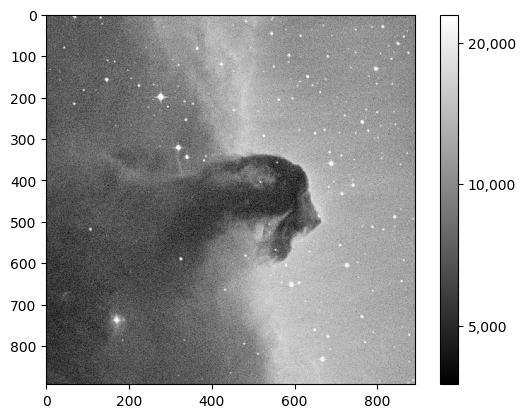

In [19]:
# Agora quero abrir a imagem em escala logarítmica, primeiro foi exportar essa função.

from matplotlib.colors import LogNorm

# Primeiro gero a imagem, inicialmente sem colorbar (apesar de que há uma escala de cor).

plt.imshow(image_data, cmap='gray', norm=LogNorm())

# Agora ploto a imagem com o colorbar, definindo os 3 pontos que quero ticks.

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])

# Mas eu não quero essa notação nos ticks do colorbar, quero a mesma notação do colorbar antigo, assim rodo a 
#linha abaixo.

cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

## Empilhamento de Imagens com M13

In [30]:
# Nessa etapa vou aprender como realizar o empilhamento de imagens, tratando os dados das imagens como numpy array.
# O objeto utilizado será M13, o Grande Aglomerado Globular de Hércules.

# Primeiro vou fazer o download dsa imagens.

image_list = [ download_file('http://data.astropy.org/tutorials/FITS-images/M13_blue_000'+n+'.fits', cache=True ) \
              for n in ['1','2','3','4','5'] ]


In [31]:
# Agora vou criar uma lista com elas, o tutorial dá duas formas de se fazer isso:

#Forma longa

#image_concat = []
#for image in image_list:
#    image_concat.append(fits.getdata(image))
    
# Forma curta

image_concat = [ fits.getdata(image) for image in image_list ]

# Repare que apesar de image_list conter todas as imagens que baixou, a lista de imagens propriamente dita é a 
#image_concat, eu usei os nomes utilizados no tutorial, mas cuidado para não se confundir. Em tese ambos são listas
#de imagens, mas a concat é a que tem os dados das imagens na forma que podemos usar para fazer operações como
#numpy arrays.


In [32]:
# Pronto, agora tenho uma lista de imagens chamada image_concat, a primeira coisa que vou fazer é empilhá-las, ou seja somar as contagens
#, importante destacar que elas devem ter o mesmo tamanho em x e y para que isso seja possível.
# Novamente o tutorial deu duas formas:

# Forma longa

#final_image = np.zeros(shape=image_concat[0].shape)

#for image in image_concat:
#    final_image += image

# Forma curta

final_image = np.sum(image_concat, axis=0)


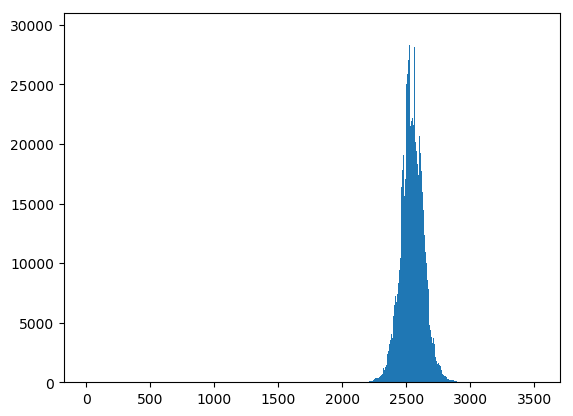

In [33]:
# Novamente eu faço um histograma, mas essa vez com a imagem empilhada

image_hist = plt.hist(final_image.flatten(), 1000)

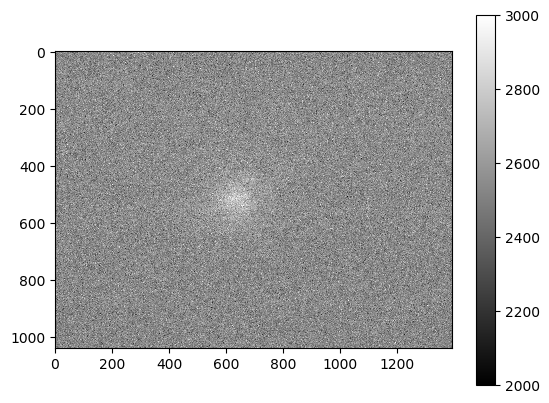

In [70]:
# Por fim, agora meus dados empilhados estão numa nova imagem chamada final_image, vou agora gerar a imagem com
#colorbar, onde o vmin e vmax definem o range de contagens do colorbar. Repare por exemplo que pixels com contagens
# maiores de 3000 nesse caso aparecerão como brancos, esse é o problema de se limitar a escala de cinza (nessa por 
#exemplo o mmáximo é 3522, conforme vi abaixo).

plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
plt.colorbar()

In [36]:
# Eu gerei a imagem final, mas não salvei ainda, agora vou salvar num arquivo fits, que vai ficar na pasta desse 
#Jupyter.

outfile = 'stacked_M13_blue.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, clobber=True)

## Exercícios

### 1) Determine the mean, median, and standard deviation of a part of the stacked M13 image where there is not light from M13. Use those statistics with a sum over the part of the image that includes M13 to estimate the total light in this image from M13.

In [59]:
# Primeiro vou ver o tamanho da imagem final, olhando o gráfico e vendo o resultado, dá pra ver que é (y,x), 
#confirmo isso mais embaixo.

final_image.shape

(1040, 1392)

In [167]:
# Lembrando que o numpy array começa no zero, aqui eu to vendo a quantidade de contagens em y=1039 e x=1391, que na
#verdade é o ponto (y,x)=(1040,1392), pois se aumentamos o valor de x,y dá erro. Assim essa é a # contagens do pixel
#mais baixo e pra direita

print(final_image[1039,1391])

# Se quiser pero do centro de M13.

print(final_image[500,650])

2505
2724


In [150]:
#Contagem máxima e mínima da imagem final

print('Max:', np.max(final_image))
print('Min:', np.min(final_image))


Max: 3522
Min: 0


In [179]:
# Agora para realizar este exercício, relembro que [a:b] significa que eu pego os valores de número (ordem) a até
# o b, porém excluindo, ou seja se tenho [0:11,0:101] isso indica que pego até a linha 10 e coluna 100. A ordem
#é [linha,coluna], melhor que pensar em [y,x].

# Eu vou considerar o ponto de x e y de zero a 100, que não pegam nada de M13, segue abaixo as estatísticas
# Importante destacar que se eu quero pegar as contagens de um (y,x) que não existe dá mensagem de erro, porém, se
# eu coloco um range onde tem (y,x) que não existem, o python não critica. Ou seja, tanto faz eu colocar pra excluir
#até o valor exato ou infinito, o resultado será o mesmo.

meanceu=np.mean(final_image[0:101,0:101])
medianceu=np.median(final_image[0:101,0:101])   
stdceu=np.std(final_image[0:101,0:101])


print('Meanceu:', meanceu)
print('Medianceu:', medianceu)
print('stdceu:', stdceu)

# Agora vou fazer o mesmo pra imagem toda

meantot=np.mean(final_image)
mediantot=np.median(final_image)   
stdtot=np.std(final_image)

print('Meantot:', meantot)
print('Mediantot:', mediantot)
print('stdtot:', stdtot)

# Vou me guiar pela mediana, assim vou reduzir a mediana do céu da mediana total, assim vou ter o número 
#aproximado de contagens por pixel de M13.

contm13porpixel=mediantot-medianceu

print('contm13:', contm13)

# Nisso tenho que definir uma abertura, eu vou considerar em média 150 pixels quadrados, para definir, assim
#tenho a área angular de M13, e posso ter o número total de contagens.

conttotalm13=contm13porpixel*(150^2)

print('conttotalm13:', conttotalm13)

# Assim, utilizando os critérios acima, M13 tem um total de contagens de 1184.

Meanceu: 2536.8097245368103
Medianceu: 2537.0
stdceu: 83.99927625558571
Meantot: 2544.96438232206
Mediantot: 2545.0
stdtot: 87.90889022462106
contm13: 8.0
conttotalm13: 1184.0


### 2) Show the image of the Horsehead Nebula, but in to units of surface brightness (magnitudes per square arcsecond). (Hint: the physical size of the image is 15x15 arcminutes.)

In [228]:
# Primeiro vamos ver o tamanho da imagem em pixels quadrados (apesar de que acho que não usarei isso)

pixquad=893*891

print('pixquad', pixquad)

# Agora vamos ver em segundos de arco quadrados

arcsecquad=(15*60)*(15*60)

print('arcsecquad', arcsecquad)

# Não tenho nenhuma estrela de referẽncia, então para simular o processo padrão, eu vou considerar contagens=100000
#como magnitude zero, assim m1-m2=-2,5log(F1/F2), nesse caso m2=0 e F2=100000, então m1=-2,5log(contagens/100000).

# Repare que as 

# Como quero brilho superficial, o que vou plotar será m/arcsecquad. Assim

mag=(-2.5*np.log10(image_data/100000))
brilhosup=mag/arcsecquad

# Assim com esses critérios definidos tenho meu brilho superficial.

pixquad 795663
arcsecquad 810000


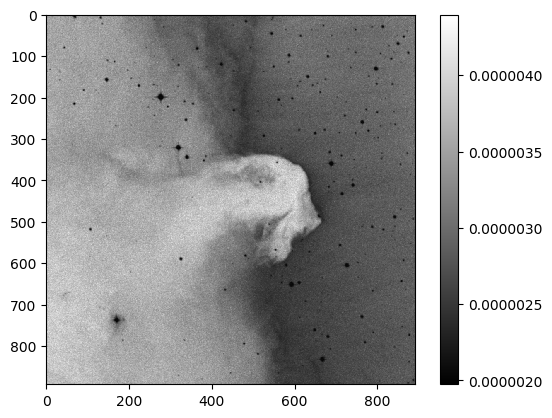

In [229]:
# Agora só vou plotar o gráfico:

plt.imshow(brilhosup, cmap='gray')
plt.colorbar()

### 3) Now write out the image you just created, preserving the header the original image had, but add a keyword 'UNITS' with the value 'mag per sq arcsec'. (Hint: you may need to read the astropy.io.fits documentation if you're not sure how to include both the header and the data)

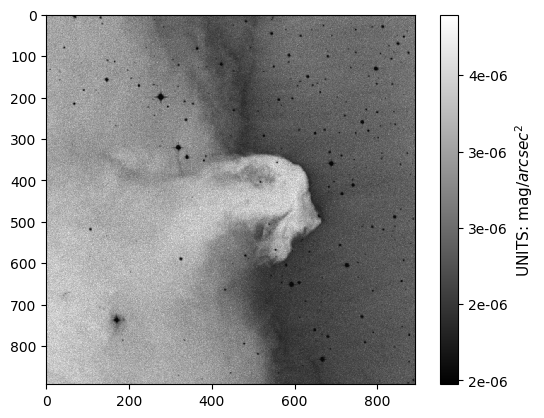

In [239]:
# Só gerei o gráfico de novo, só que nomeando o colorbar e usando a função set_label, esse "format.." eu coloquei
#pra deixar o eixo em notação científica.

plt.imshow(brilhosup, cmap='gray')
a=plt.colorbar(format='%.0e')
a.set_label('UNITS: mag/$arcsec^{2}$', fontsize=11, color='black')
